In [2]:
import graph_importer as gim

In [3]:
G = gim.make_graph("./concordant_networks/temponet_1_365.lgl")

In [13]:
vx_moves = [{'loc': v['loc'], 't': v['time'], 'w': sum(ex['weight'] for ex in v.out_edges())} for v in G.vs]

In [14]:
vx_moves[:5]

[{'loc': 3805, 't': 236, 'w': 491.0},
 {'loc': 3805, 't': 237, 'w': 491.0},
 {'loc': 3805, 't': 314, 'w': 448.0},
 {'loc': 9777, 't': 270, 'w': 4.0},
 {'loc': 3805, 't': 255, 'w': 476.0}]

In [16]:
import polars as pl
from matplotlib import pyplot as plt

In [17]:
movements = pl.from_records(vx_moves)

In [34]:
movements.write_csv("concordant_networks/analyses/movement_aggregated.csv")

In [19]:
import seaborn as sns

Text(0, 0.5, 'Total number of movements')

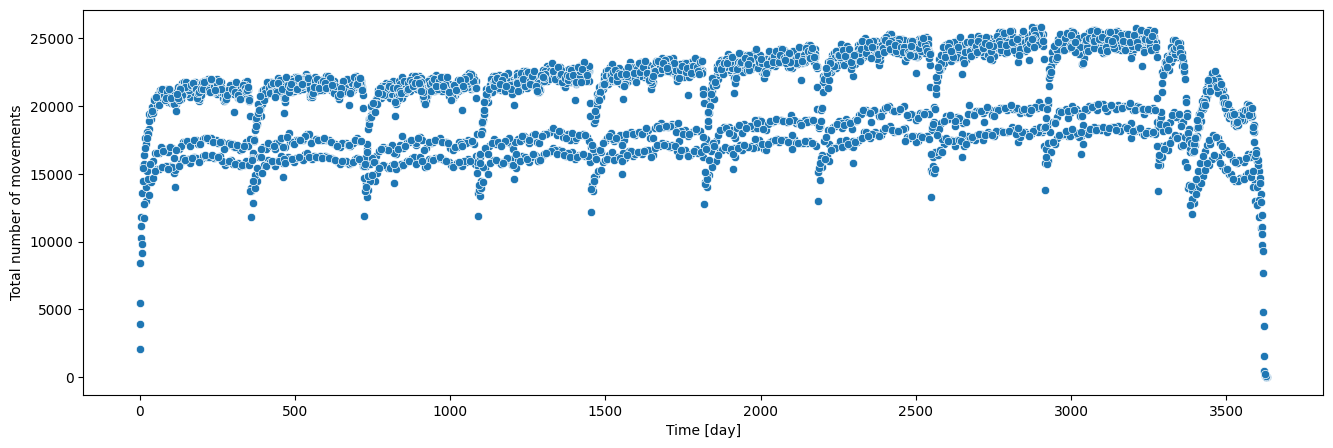

In [32]:
fig, ax = plt.subplots(figsize=(16, 5))
sns.scatterplot(
    data=movements.group_by(pl.col('t')).agg(pl.col('w').sum()), 
    x='t', y='w',
    ax=ax,
)
plt.xlabel('Time [day]')
plt.ylabel('Total number of movements')